In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas_datareader as pddr
import pandas as pd
from datetime import datetime

One working engine would be to work with 'fred' and download 'DJIA' (Dow Jones Industrial Average). This is the longest time series available.

Others that should work are:
* AAPL google
* SP500 fred
* NASDAQCOM fred
* (see more at https://fred.stlouisfed.org/categories/32255)

In [4]:
df = pddr.DataReader('DJIA', data_source='fred', start=datetime(year=1990, month=1, day=1))

In [5]:
df.head()

,DJIA
DATE,
2008-03-14,11951.09
2008-03-17,11972.25
2008-03-18,12392.66
2008-03-19,12099.66
2008-03-20,12361.32


In [6]:
df.tail()

,DJIA
DATE,
2018-03-08,24895.21
2018-03-09,25335.74
2018-03-12,25178.61
2018-03-13,25007.03
2018-03-14,24758.12


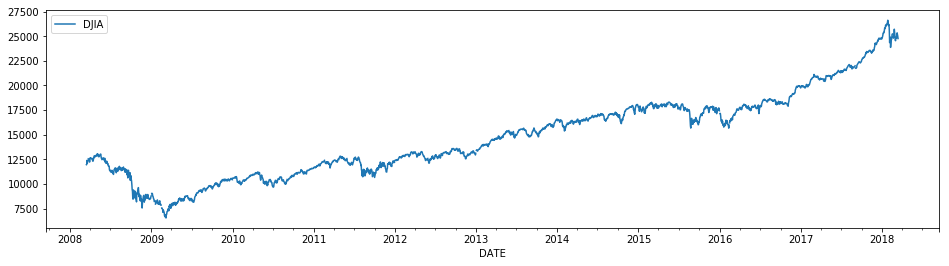

In [8]:
f, ax = subplots(figsize=(16, 4))
df.plot(y='DJIA', ax=ax)

In [9]:
df['Return'] = (df['DJIA'] - df.shift(1)['DJIA']) / df.shift(1)['DJIA']

In [10]:
df.head()

,DJIA,Return
DATE,,
2008-03-14,11951.09,NaN
2008-03-17,11972.25,0.001771
2008-03-18,12392.66,0.035115
2008-03-19,12099.66,-0.023643
2008-03-20,12361.32,0.021625


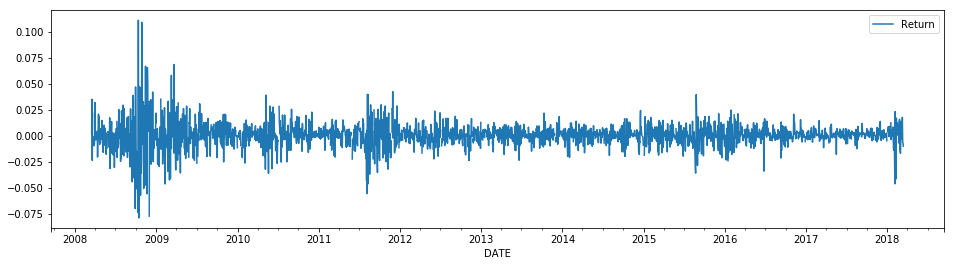

In [11]:
f, ax = subplots(figsize=(16, 4))
df.plot(y='Return', ax=ax)

In [12]:
df['LogReturn'] = np.log(1 + df['Return'])

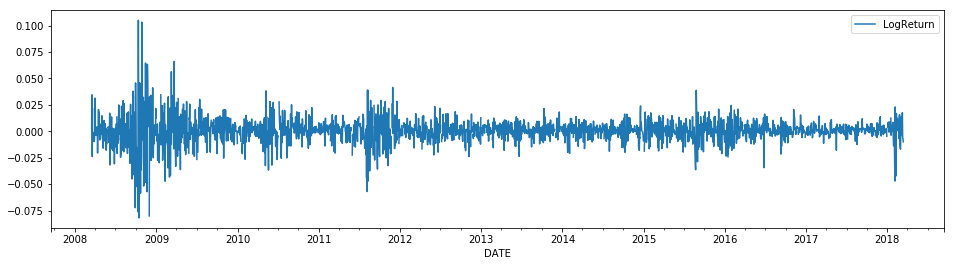

In [13]:
f, ax = subplots(figsize=(16, 4))
df.plot(y='LogReturn', ax=ax)

In [14]:
df.head()

,DJIA,Return,LogReturn
DATE,,,
2008-03-14,11951.09,NaN,NaN
2008-03-17,11972.25,0.001771,0.001769
2008-03-18,12392.66,0.035115,0.034513
2008-03-19,12099.66,-0.023643,-0.023927
2008-03-20,12361.32,0.021625,0.021395


## Financial time series: stylized facts

the seemingly random variations of asset prices do share some quite non-trivial statistical properties. Such properties, common across a wide range of instruments, markets and time periods are called _stylized empirical facts._

### 1. Heavy tails

the (unconditional) distribution of returns seems to display a power-law or Pareto-like tail, with a tail index which is finite, higher than two and less than five for most data sets studied. In particular this excludes stable laws with infinite variance and the normal distribution.

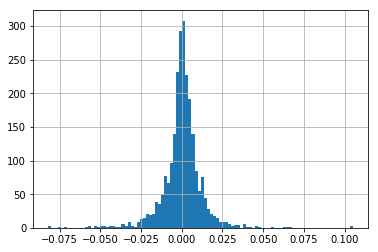

In [19]:
### plot histogram of log-returns
df.LogReturn.hist(bins=100)
### plot normal distribution PDF with parameters estimated from log returns
### plot Student's t (nu=3) with parameters estimated from log returns

### 2. Aggregational Gaussianity

as one increases the time scale $Δt$ over which returns are calculated, their distribution looks more and more like a normal distribution. In particular, the shape of the distribution is not the same at different time scales.

In [31]:
### plot histogram of WEEKLY, MONTHLY and YEARLY log-returns
### plot normal distribution PDF with parameters estimated from log returns
### plot Student's t (nu=3, 4, 5) with parameters estimated from log returns

### 3. Absence of autocorrelation

(linear) autocorrelations of asset returns are often insignificant, except for very small intraday time scales.

In [ ]:
### use statsmodels.graphics.tsaplots.plot_acf to visualise the autocorrelation in log-returns
### use statsmodels.tsa.stattools.q_stat to compute Ljung-Box test
### do the original log-return series exhibit autocorrelations?

### 4. Autocorrelation of absolute returns

It is a stylized fact that the autocorrelation function (ACF) of absolute log-returns decays as a power-law. However, we will see below that this widespread belief is probably not justified.

In [120]:
### use statsmodels.graphics.tsaplots.plot_acf to visualise the autocorrelation in ABSOLUTE log-returns
### use statsmodels.tsa.stattools.q_stat to compute Ljung-Box test
### do the ABSOLUTE log-return series exhibit autocorrelations?
### plot log(autocorrelation coefficient) vs. log(lag) and approximate it using a linear fit
### what is the slope of the fit? write down the approximation to the dependency

It is often concluded from fits like this that the autocorrelation function of volatility decays roughly as $t^{-\alpha}$ with $\alpha \approx 0.3$.

### 5. Autocorrelation function of volatility is nonlinear

Decay of autocorrelations in volatility over time:
$$\rho(\Delta) \sim \exp\Big\{-\frac 1 2 \nu^2 \Delta^{2H}\Big\}$$

In [119]:
### plot fitted dependency over log(lag_k)/log(rho_k) plot
### plot nonlinear dependency with H=0.2, A=0.3

### 6. Autocorrelation of squared log-returns. Decay of the volatility ACF

Absolute daily log-returns $|r_t|$ are (very) noisy proxies for daily volatilities $\sigma_t$ and squared daily log-returns $r_t^2$ are (very) noisy proxies for daily variances $\sigma^2_t$.

### 7. Conditional heavy tails

even after correcting returns for volatility clustering (e.g. via GARCH-type models), the residual time series still exhibit heavy tails. However, the tails are less heavy than in the unconditional distribution of returns.

In [ ]:
### fit a GARCH(p, q) model to the log-return time series (use arch_model package)
### compute standardized residuals from the model 

### 8. Gain/loss asymmetry

one observes large drawdowns in stock prices and stock index values but not equally large upward movements.


In [121]:
### pick a certain investment level sigma (say, +2%)
### for that level, compute the estimate of the distribution of first passage times and plot it
### do the same for the negative log-return level (say, -2%)
### compare the plotted dependencies

### 9. Volume/volatility correlation

trading volume is positively correlated with market volatility.

In [122]:
### compute pairs of traded volumes and volatility
### estimate correlation (regress linearly one upon the other)